# Analyse des profils clients

Ce notebook explore et interprète les clusters obtenus dans le profilage client.

## Contenu :
- Visualisation des clusters RFM
- Analyse descriptive des groupes :
  - Quels types de clients ?
  - Quelle fréquence d’achat ?
  - Quel montant dépensé ?
- Attribution de labels aux profils (ex : fidèle, occasionnel, gros dépensier)

Ces informations alimenteront la personnalisation des recommandations.


In [1]:
# Ouverture du fichier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "../data/rfm_data.csv"
DATA = pd.read_csv(FILE)
print(DATA.shape)
DATA.head()

(4338, 8)


,Total_Purchases,Purchase_Frequency,Unique_Products,Average_Basket,Active_Days,Cluster,PCA1,PCA2
0,1,1,1,77183.600000,1,0,-0.036579,0.024668
1,7,182,103,6498.979011,7,1,0.031528,-0.004743
2,4,31,22,13495.487419,4,0,-0.017361,0.016516
3,1,73,73,5230.384932,1,0,-0.011955,-0.017949
4,1,17,17,756.711765,1,0,-0.034325,0.002772


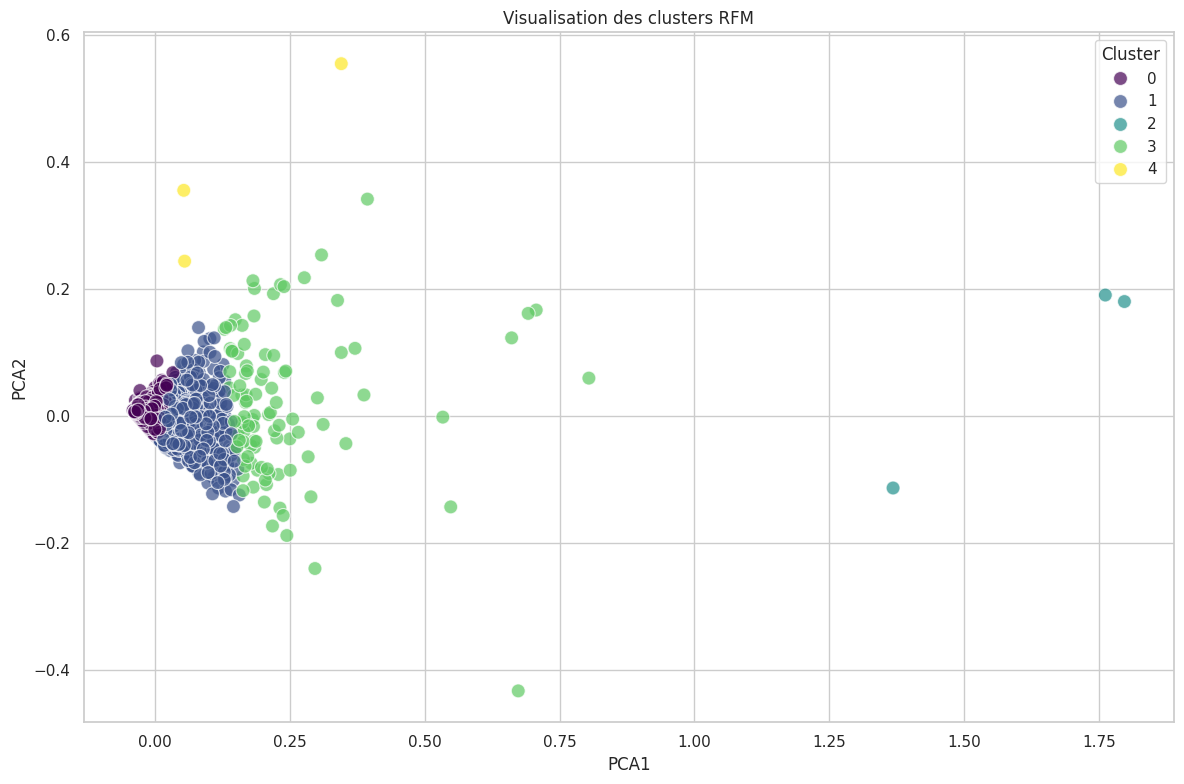

   Cluster  Total_Purchases  Purchase_Frequency  Unique_Products  \
0        0         2.314667           37.245926        31.882667   
1        1         8.153302          208.538915       142.325472   
2        2       178.000000         6039.000000      1626.000000   
3        3        29.330275          706.036697       307.944954   
4        4        25.000000           87.666667        17.333333   

   Average_Basket  Active_Days  
0    1.473887e+03     2.311407  
1    6.745563e+03     8.107311  
2    1.657028e+05   178.333333  
3    3.664179e+04    28.954128  
4    1.359304e+06    24.333333  


/tmp/ipykernel_10912/385825116.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_data, x='Profile', palette='viridis')


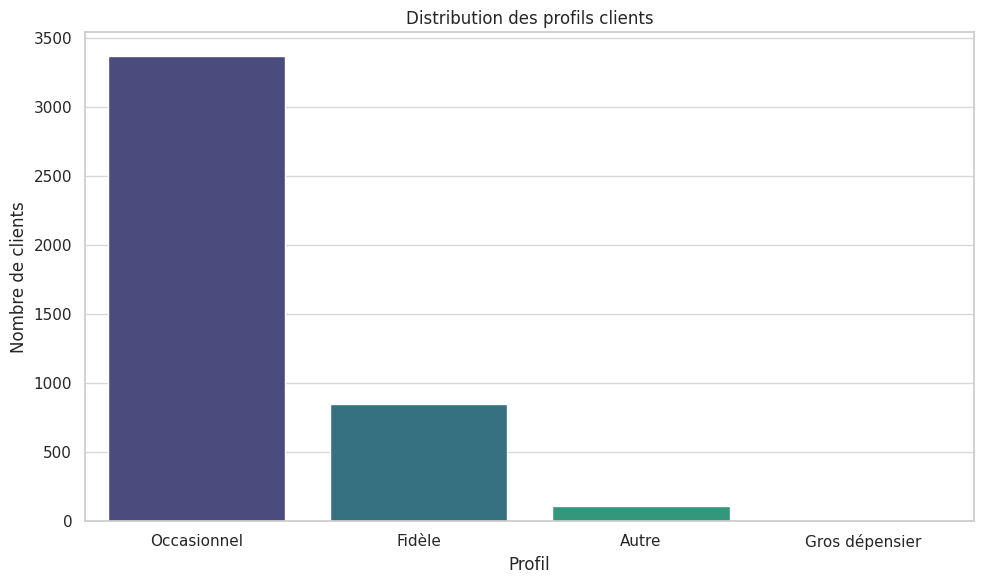

,Total_Purchases,Purchase_Frequency,Unique_Products,Average_Basket,Active_Days,Cluster,PCA1,PCA2,Profile
0,1,1,1,77183.600000,1,0,-0.036579,0.024668,Occasionnel
1,7,182,103,6498.979011,7,1,0.031528,-0.004743,Fidèle
2,4,31,22,13495.487419,4,0,-0.017361,0.016516,Occasionnel
3,1,73,73,5230.384932,1,0,-0.011955,-0.017949,Occasionnel
4,1,17,17,756.711765,1,0,-0.034325,0.002772,Occasionnel
5,8,85,59,8538.858353,8,0,0.016317,0.018478,Occasionnel
6,1,4,4,121.500000,1,0,-0.039496,0.007665,Occasionnel
7,1,58,58,2387.010345,1,0,-0.018035,-0.012737,Occasionnel
8,1,13,13,1008.923077,1,0,-0.035892,0.004369,Occasionnel
9,3,59,53,5093.087627,3,0,-0.010327,-0.001544,Occasionnel


In [ ]:
# Analyse des clusters
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=DATA, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7, s=100)
plt.title("Visualisation des clusters RFM")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyse descriptive des groupes
cluster_analysis = DATA.groupby('Cluster').agg({
    'Total_Purchases': 'mean',
    'Purchase_Frequency': 'mean',
    'Unique_Products': 'mean',
    'Average_Basket': 'mean',
    'Active_Days': 'mean'
}).reset_index()
print(cluster_analysis)

# Attribution de labels aux profils
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Occasionnel'
    elif row['Cluster'] == 1:
        return 'Fidèle'
    elif row['Cluster'] == 2:
        return 'Gros dépensier'
    else:
        return 'Autre'
rfm_data = DATA.copy()
rfm_data['Profile'] = rfm_data.apply(label_cluster, axis=1)
# Visualisation des profils
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, x='Profile', palette='viridis')
plt.title("Distribution des profils clients")
plt.xlabel("Profil")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# sauvegarde des données
rfm_data.to_csv("../data/rfm_data.csv", index=False)
rfm_data.head(20)